In [0]:
pip install pydicom

     |████████████████████████████████| 7.1MB 42.5MB/s 


In [0]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pydicom
import pandas as pd
from glob import glob
import os
from matplotlib.patches import Rectangle
import seaborn as sns
import cv2

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import os
import keras
from keras.applications.densenet import DenseNet121
from keras.layers import Input
from keras.models import Model
from keras.layers import Dense
from keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
#from generator import DataGenerator

In [0]:
from keras.models import Sequential
from keras.layers import Convolution2D, Dropout, Dense,Conv2D
from keras.layers import BatchNormalization,Activation
from keras.layers import MaxPooling2D,GlobalAveragePooling2D
from keras.layers import Flatten
from keras.optimizers import adam
from keras import optimizers


In [0]:
cd drive/My Drive/Capstone

/content/drive/My Drive/Capstone


In [0]:
!ls

 backup
 cfg
 chexnet_weights_pnemonia_1.h5
 chexnet_weights_pnemonia_2.h5
 chexnet_weights_pnemonia_adadelta.h5
 chexnet_weights_pnemonia_adagrad.h5
 chexnet_weights_pnemonia_adam1.h5
 chexnet_weights_pnemonia_adam2.h5
 chexnet_weights_pnemonia_adam.h5
 chexnet_weights_pnemonia.h5
 chexnet_weights_pnemonia_rmsprop.h5
 chexnet_weights_pnemonia_sgd.h5
 Classfiication_Report_lavasesha.ipynb
'Classification Model.ipynb'
 Classification_Model.ipynb
 darknet
 darknet_gpu
 FinalSubmission
 fulltrainlabel_adam.h5
 images
 InceptionV3_rmsprop.h5
 keras-retinanet-master
 labels
 metadata
 model_pnemonia_adadelta.h5
 model_pnemonia_adagrad.h5
 model_pnemonia_adam1.h5
 model_pnemonia_adam2.h5
 model_pnemonia_adam.h5
 model_pnemonia_adamlr.h5
 model_pnemonia.h5
 model_pnemonia_rmsprop.h5
 model_pnemonia_sgd.h5
 Models
 PretrainedWeights
 RSNA_Classification_EDA_Imran_CheXnet_75ValAccuracy.ipynb
 RSNA_EDA_lavasesha.ipynb
 RSNA_EDA_Malini.ipynb
 rsna_pneumonia_detection_challenge_kaggle.ipynb
 RSNA_

In [0]:
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        #horizontal_flip=True
         )

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator_1 = train_datagen.flow_from_directory(
        '/content/drive/My Drive/Capstone/train_png/',
        target_size=(256, 256),
        batch_size=32,color_mode='rgb',
        class_mode='binary')

validation_generator_1 = test_datagen.flow_from_directory(
        '/content/drive/My Drive/Capstone/validation_png/',
        target_size=(256, 256),
        batch_size=32,color_mode='rgb',
        class_mode='binary')

Found 4838 images belonging to 2 classes.
Found 441 images belonging to 2 classes.


In [0]:
# input_shape=(256,256,3)
# img_in = Input(input_shape)              #input of model 
# model = DenseNet121(include_top= False , # remove  the 3 fully-connected layers at the top of the network
#                 weights='/content/drive/My Drive/Colab Notebooks/RSNA/rsna-pneumonia-detection-challenge/brucechou1983_CheXNet_Keras_0.3.0_weights.h5',      # pre train weight 
#                 input_tensor= img_in, 
#                 input_shape= input_shape,
#                 pooling ='max') 



In [0]:
input_shape=(256,256,3)
img_in = Input(input_shape)              #input of model 
model = DenseNet121(include_top= False , # remove  the 3 fully-connected layers at the top of the network
                weights= None,      # pre train weight 
                input_tensor= img_in, 
                input_shape= input_shape,
                pooling ='max') 

W0713 04:05:55.337440 140211364968320 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0713 04:05:55.376651 140211364968320 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0713 04:05:55.387323 140211364968320 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0713 04:05:55.419352 140211364968320 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:174: The name tf.get_default_session is deprecated. Please use tf.compat.v1.get_default_session instead.

W0713 04:05:55.420265 1402113649

In [0]:
model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 256, 256, 3)  0                                            
__________________________________________________________________________________________________
zero_padding2d_1 (ZeroPadding2D (None, 262, 262, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1/conv (Conv2D)             (None, 128, 128, 64) 9408        zero_padding2d_1[0][0]           
__________________________________________________________________________________________________
conv1/bn (BatchNormalization)   (None, 128, 128, 64) 256         conv1/conv[0][0]                 
__________________________________________________________________________________________________
conv1/relu

In [0]:
x = model.get_output_at(-1)
#layer_output = self.layer.get_output_at(-1)
predictions = Dense(14, activation="sigmoid",name="predictions")(x)
model11 = Model(inputs=img_in, outputs=predictions)

In [0]:
# for layer in model11.layers[:-3]:
#    layer.trainable = False

In [0]:
for layer in model11.layers[:-5]:
   layer.trainable = False

In [0]:
model11.load_weights('/content/drive/My Drive/Capstone/PretrainedWeights/brucechou1983_CheXNet_Keras_0.3.0_weights.h5')

In [0]:
# Create the model
model_pretrainedW_3000= Sequential()
 
# Add the vgg convolutional base model
model_pretrainedW_3000.add(model11)
 
# Add new layers
# model_pretrainedW_3000.add(Dropout(0.25))
# model_pretrainedW_3000.add(Dense(256, activation='relu'))
# model_pretrainedW_3000.add(Dropout(0.25))
model_pretrainedW_3000.add(Dense(512, activation='relu'))
model_pretrainedW_3000.add(Dropout(0.25))
model_pretrainedW_3000.add(Dense(256, activation='relu'))
model_pretrainedW_3000.add(Dropout(0.25))
#model_pretrainedW_3000.add(Dense(32, activation='relu'))
#model_pretrainedW_3000.add(Dropout(0.25))
model_pretrainedW_3000.add(Dense(1, activation='sigmoid'))

#model_vgg_flow.add(Dense(1, activation='softmax')) 
# Show a summary of the model. Check the number of trainable parameters
model_pretrainedW_3000.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
model_1 (Model)              (None, 14)                7051854   
_________________________________________________________________
dense_30 (Dense)             (None, 512)               7680      
_________________________________________________________________
dropout_22 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_31 (Dense)             (None, 256)               131328    
_________________________________________________________________
dropout_23 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_32 (Dense)             (None, 32)                8224      
_________________________________________________________________
dropout_24 (Dropout)         (None, 32)                0         
__________

In [0]:
batch_size=128
sgd = optimizers.SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
adam = optimizers.Adam(lr=0.1, decay=1e-1, beta_1=0.333, beta_2=0.111 )
#model_pretrainedW_3000.compile(optimizer=adam,loss='binary_crossentropy',metrics=['accuracy'])
checkpointer = ModelCheckpoint(filepath='/content/drive/My Drive/Capstone/chexnet_weights_pnemonia_adam.h5' , monitor='val_loss', verbose=1, save_best_only=True, save_weights_only=True, mode='val_acc')
model_pretrainedW_3000.compile(optimizer= adam, loss='binary_crossentropy', metrics=['accuracy'])
model_pretrainedW_3000.fit_generator(
        train_generator_1,
        steps_per_epoch=4838 // batch_size,
        epochs=70,
        validation_data=validation_generator_1, callbacks =[checkpointer],
        validation_steps=441// batch_size)
#model_pretrainedW_3000.save_weights('/content/drive/My Drive/Capstone/chexnet_weights_pnemonia_adam.h5')  # always save your weights after training or during training


/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:407: RuntimeWarning: ModelCheckpoint mode val_acc is unknown, fallback to auto mode.
  RuntimeWarning)


Epoch 1/70
37/37 [==============================] - 35s 952ms/step - loss: 0.6609 - acc: 0.6284 - val_loss: 0.6870 - val_acc: 0.5730

Epoch 00001: val_loss improved from inf to 0.68700, saving model to /content/drive/My Drive/Capstone/chexnet_weights_pnemonia_adam.h5
Epoch 2/70
37/37 [==============================] - 15s 415ms/step - loss: 0.6634 - acc: 0.6225 - val_loss: 0.6775 - val_acc: 0.5938

Epoch 00002: val_loss improved from 0.68700 to 0.67754, saving model to /content/drive/My Drive/Capstone/chexnet_weights_pnemonia_adam.h5
Epoch 3/70
37/37 [==============================] - 18s 494ms/step - loss: 0.6662 - acc: 0.6166 - val_loss: 0.6715 - val_acc: 0.6042

Epoch 00003: val_loss improved from 0.67754 to 0.67153, saving model to /content/drive/My Drive/Capstone/chexnet_weights_pnemonia_adam.h5
Epoch 4/70
37/37 [==============================] - 18s 483ms/step - loss: 0.6761 - acc: 0.5945 - val_loss: 0.6760 - val_acc: 0.5938

Epoch 00004: val_loss did not improve from 0.67153
Epo

In [0]:
import os
import cv2 

data = []
labels = []

patientID=[]
filename=[]
TestDir= '/content/drive/My Drive/Capstone/validation_png/'

# loop over the input images
dirs = os.listdir(TestDir) 
for dir in dirs:
    absDirPath = os.path.join(os.path.sep,TestDir, dir)
    images = os.listdir(absDirPath)
    for imageFileName in images:
        
        # load the image, pre-process it, and store it in the data list
        imageFullPath = os.path.join(TestDir, dir, imageFileName)
        #print(imageFullPath)
        img = load_img(imageFullPath)
        arr = img_to_array(img)  #Numpy array with shape (233,233,3)
        arr = cv2.resize(arr, (256,256)) #Numpy array with shape (HEIGHT, WIDTH,3)
        #print(arr.shape)
        data.append(arr)
        patientID.append(imageFileName.split('/')[-1].split('.')[0])
        #print(patientID)
        filename.append(imageFullPath)
        
        #label = classes_to_int(dir)
        if(dir== 'validation_pneumonia'):
          label=1
        else:
          label=0
        #print(label)
        labels.append(label)
    print(len(images))
    
print('Number of images :-',len(data))
print('Number of Labels',len(labels))
print('Number of patientID :-',len(patientID))
print(len(filename))

191
250
Number of images :- 441
Number of Labels 441
Number of patientID :- 441
441


In [0]:
Valid_df = pd.DataFrame({ 
                        'patientId':patientID,
                       'images':data,
                        'Labels': labels,
                         'Filenames':filename
                         })

In [0]:
#model= load_model("/content/drive/My Drive/Capstone/model_pnemonia_adam.h5")
y_preds=[]
for img in Valid_df['images']:
  img=img.reshape(-1,256,256,3)
  pred_1=model_pretrainedW_3000.predict(img)
  y_preds.append(pred_1)

In [0]:
Valid_df['preds']=y_preds

In [0]:
Valid_df[['Labels', 'preds']]

,Labels,preds
0,1,[[0.37732956]]
1,1,[[0.37732956]]
2,1,[[0.37732956]]
3,1,[[0.37732956]]
4,1,[[0.37732956]]
5,1,[[0.37732956]]
6,1,[[0.37732956]]
7,1,[[0.37732956]]
8,1,[[0.37732956]]
9,1,[[0.37732956]]


In [0]:
y_preds_1=y_preds

In [0]:
preds=[]
for i, predicted in enumerate(y_preds_1):
  if (predicted[0][0])>=0.4:
    value=1
    preds.append(value)
      
    
  else :
    value=0
    preds.append(value)

In [0]:
y_val=Valid_df['Labels']

In [0]:
from sklearn.metrics import confusion_matrix,classification_report
print("\nConfusion_Marix is :\n",confusion_matrix(y_val, preds))
print("\nClassification_Report is :\n",classification_report(y_val, preds))


Confusion_Marix is :
 [[250   0]
 [191   0]]

Classification_Report is :
               precision    recall  f1-score   support

           0       0.57      1.00      0.72       250
           1       0.00      0.00      0.00       191

    accuracy                           0.57       441
   macro avg       0.28      0.50      0.36       441
weighted avg       0.32      0.57      0.41       441



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


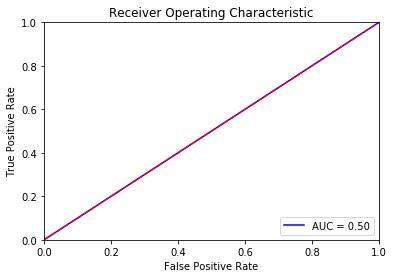

In [0]:
import sklearn.metrics as metrics
# calculate the fpr and tpr for all thresholds of the classification

fpr, tpr, threshold = metrics.roc_curve(y_val, preds)
roc_auc = metrics.auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()